# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, AgglomerativeClustering
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from sklearn.tree import DecisionTreeRegressor

In [5]:
healthcare_dataset = pd.read_csv('healthcare_dataset.csv')

# Data Clening & Transformation

## Missing Values

In [6]:
missing_values = healthcare_dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

healthcare_dataset['Age'].fillna(healthcare_dataset['Age'].mean(), inplace=True)

Missing Values:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


## Date Transformation

In [7]:
healthcare_dataset['Date of Admission'] = pd.to_datetime(healthcare_dataset['Date of Admission'])
healthcare_dataset['Discharge Date'] = pd.to_datetime(healthcare_dataset['Discharge Date'])

healthcare_dataset['Duration of Stay'] = (healthcare_dataset['Discharge Date'] - healthcare_dataset['Date of Admission']).dt.days

# Visualization (EDA) 

## Age and Gender Distribution

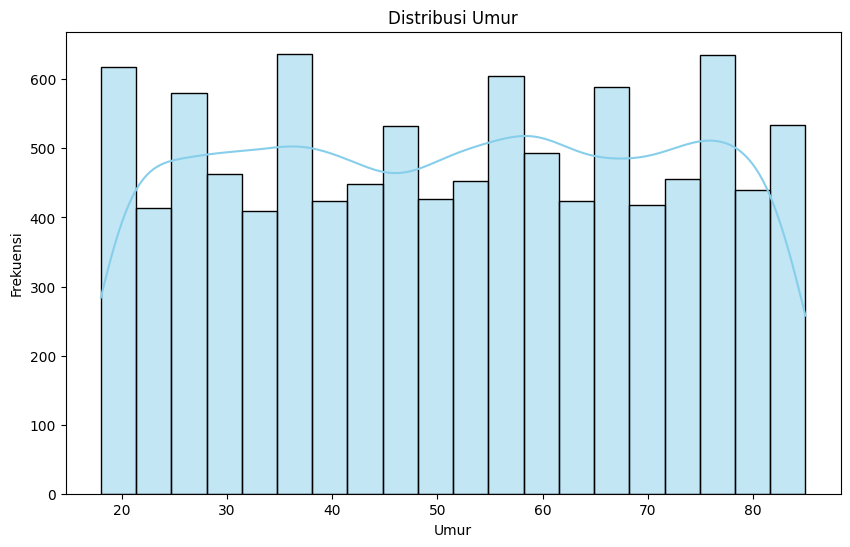

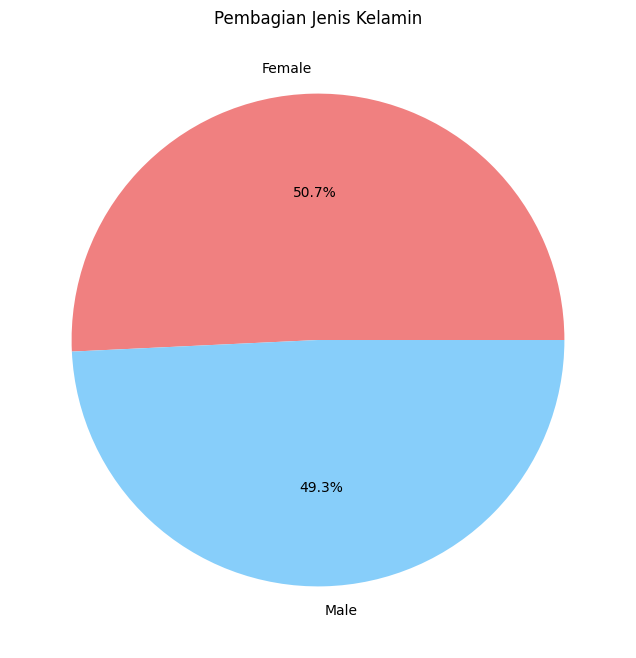

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(healthcare_dataset['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

gender_distribution = healthcare_dataset['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Pembagian Jenis Kelamin')
plt.show()

## Correlation

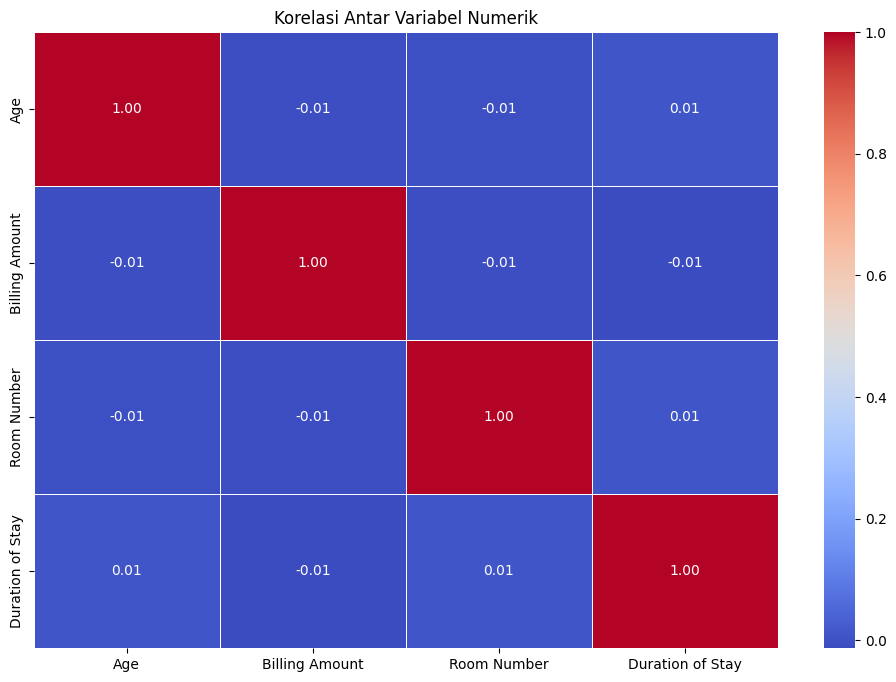

In [11]:
numeric_columns = healthcare_dataset.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = healthcare_dataset[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

## Distribution of Medical Conditions and Blood Type

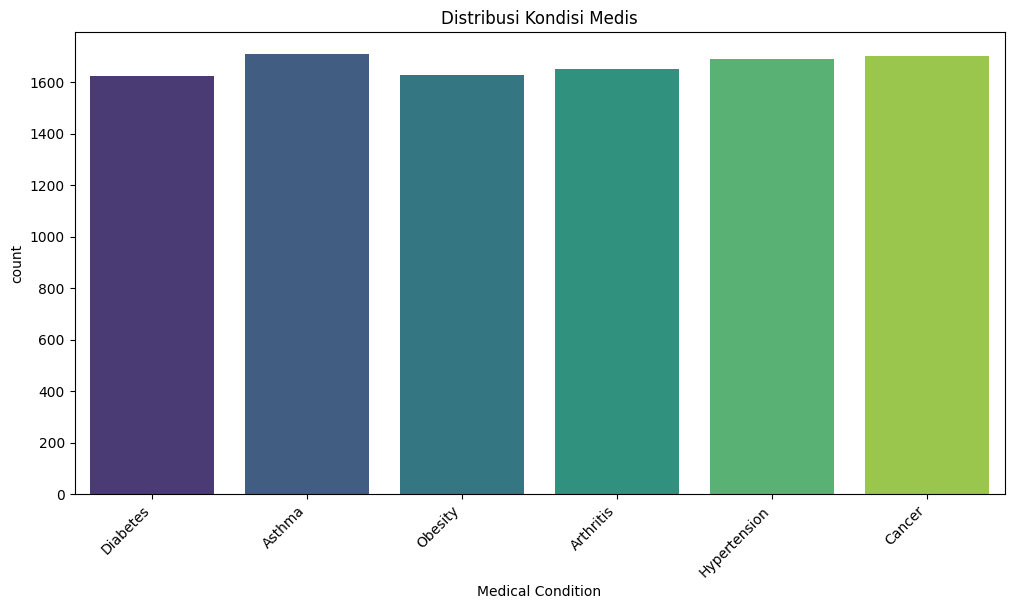

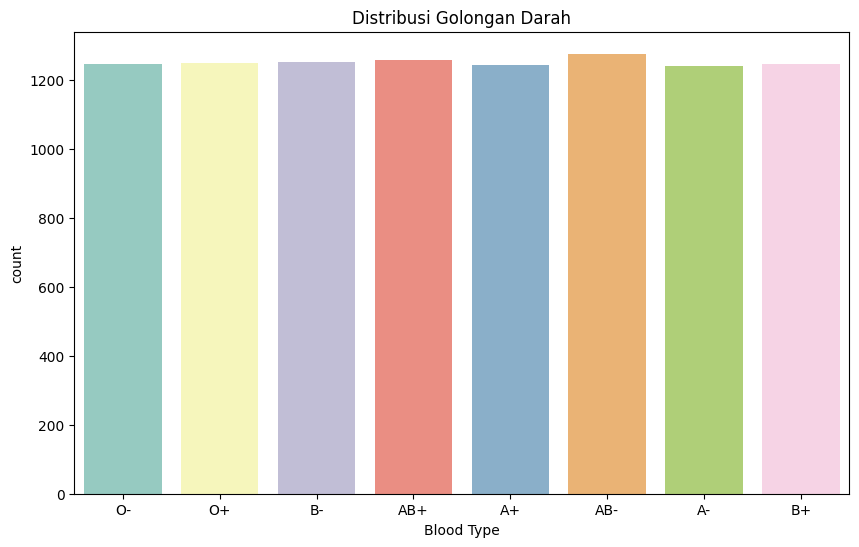

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Medical Condition', data=healthcare_dataset, palette='viridis')
plt.title('Distribusi Kondisi Medis')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Blood Type', data=healthcare_dataset, palette='Set3')
plt.title('Distribusi Golongan Darah')
plt.show()

## Cost Analysis

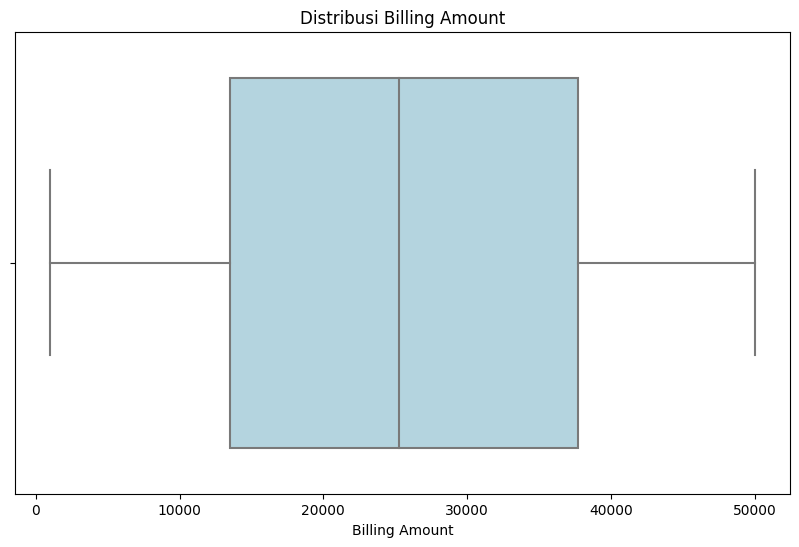

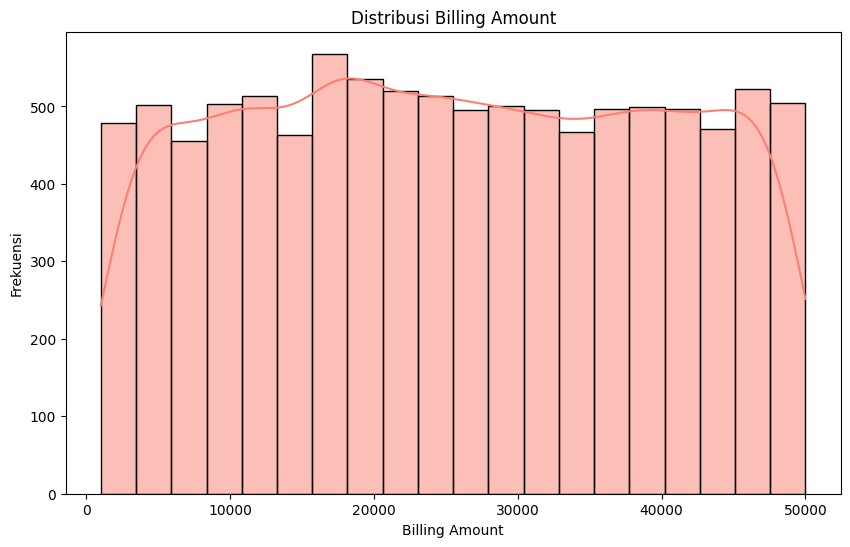

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Billing Amount', data=healthcare_dataset, color='lightblue')
plt.title('Distribusi Billing Amount')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(healthcare_dataset['Billing Amount'], bins=20, kde=True, color='salmon')
plt.title('Distribusi Billing Amount')
plt.xlabel('Billing Amount')
plt.ylabel('Frekuensi')
plt.show()

# Machine Learning

## Regression

In [18]:
X_reg = healthcare_dataset[['Age', 'Duration of Stay']]
y_reg = healthcare_dataset['Billing Amount']
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_reg_train, y_reg_train)
linear_reg_predictions = linear_reg_model.predict(X_reg_test)

xgboost_model = XGBRegressor()
xgboost_model.fit(X_reg_train, y_reg_train)
xgboost_predictions = xgboost_model.predict(X_reg_test)

print("Linear Regression:")
print("MSE:", mean_squared_error(y_reg_test, linear_reg_predictions))
print("MAE:", mean_absolute_error(y_reg_test, linear_reg_predictions))

print("\nXGBoost Regression:")
print("MSE:", mean_squared_error(y_reg_test, xgboost_predictions))
print("MAE:", mean_absolute_error(y_reg_test, xgboost_predictions))

Linear Regression:
MSE: 199969401.82357073
MAE: 12276.463693889667

XGBoost Regression:
MSE: 219288560.4881069
MAE: 12666.028814624515


## Classification

In [20]:
le = LabelEncoder()
healthcare_dataset['Medical Condition'] = le.fit_transform(healthcare_dataset['Medical Condition'])

X_class = healthcare_dataset[['Age', 'Duration of Stay']]
y_class = healthcare_dataset['Medical Condition']
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_class_train, y_class_train)
logistic_predictions = logistic_model.predict(X_class_test)

knn_model = KNeighborsClassifier()
knn_model.fit(X_class_train, y_class_train)
knn_predictions = knn_model.predict(X_class_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_class_test, logistic_predictions))
print("Precision:", precision_score(y_class_test, logistic_predictions, average='weighted'))
print("Recall:", recall_score(y_class_test, logistic_predictions, average='weighted'))

print("\nKNN Classifier:")
print("Accuracy:", accuracy_score(y_class_test, knn_predictions))
print("Precision:", precision_score(y_class_test, knn_predictions, average='weighted'))
print("Recall:", recall_score(y_class_test, knn_predictions, average='weighted'))

Logistic Regression:
Accuracy: 0.1715
Precision: 0.11551960711698635
Recall: 0.1715

KNN Classifier:
Accuracy: 0.164
Precision: 0.16168507162104104
Recall: 0.164


C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Clustering

C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


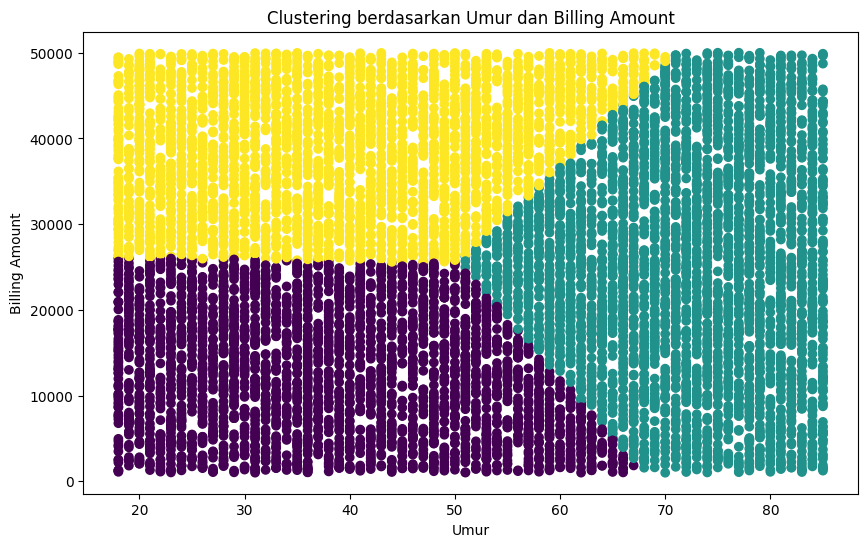

In [22]:
X_cluster = healthcare_dataset[['Age', 'Billing Amount']]
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
healthcare_dataset['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_cluster['Age'], X_cluster['Billing Amount'], c=healthcare_dataset['Cluster'], cmap='viridis')
plt.title('Clustering berdasarkan Umur dan Billing Amount')
plt.xlabel('Umur')
plt.ylabel('Billing Amount')
plt.show()

## A Priori For Association Patterns

In [24]:
medication_lists = healthcare_dataset['Medication'].str.split(',').apply(lambda x: [item.strip() for item in x])
te = TransactionEncoder()
te_array = te.fit(medication_lists).transform(medication_lists)
medication_df = pd.DataFrame(te_array, columns=te.columns_)

frequent_itemsets = apriori(medication_df, min_support=0.1, use_colnames=True)

print("Pola Asosiasi:")
print(frequent_itemsets)

Pola Asosiasi:
   support       itemsets
0   0.1968      (Aspirin)
1   0.1976    (Ibuprofen)
2   0.2015      (Lipitor)
3   0.1962  (Paracetamol)
4   0.2079   (Penicillin)


# Compare

## Regression (Example: Prediction Billing Amount)

In [29]:
X_reg = healthcare_dataset[['Age', 'Duration of Stay']]
y_reg = healthcare_dataset['Billing Amount']
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Regresi Linear
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_reg_train, y_reg_train)
linear_reg_predictions = linear_reg_model.predict(X_reg_test)

# Random Forest Regressor
rf_reg_model = RandomForestRegressor()
rf_reg_model.fit(X_reg_train, y_reg_train)
rf_reg_predictions = rf_reg_model.predict(X_reg_test)

# KNN Regressor
knn_reg_model = KNeighborsRegressor()
knn_reg_model.fit(X_reg_train, y_reg_train)
knn_reg_predictions = knn_reg_model.predict(X_reg_test)

# Evaluasi kinerja model
print("Linear Regression:")
print("MSE:", mean_squared_error(y_reg_test, linear_reg_predictions))
print("MAE:", mean_absolute_error(y_reg_test, linear_reg_predictions))

print("\nRandom Forest Regressor:")
print("MSE:", mean_squared_error(y_reg_test, rf_reg_predictions))
print("MAE:", mean_absolute_error(y_reg_test, rf_reg_predictions))

print("\nKNN Regressor:")
print("MSE:", mean_squared_error(y_reg_test, knn_reg_predictions))
print("MAE:", mean_absolute_error(y_reg_test, knn_reg_predictions))

Linear Regression:
MSE: 199969401.82357073
MAE: 12276.463693889667

Random Forest Regressor:
MSE: 242533247.09428072
MAE: 13162.835573264312

KNN Regressor:
MSE: 235585330.29528147
MAE: 13079.762499517616


## Classification (Example: Prediction Medical Condition):

In [38]:
X_class = healthcare_dataset[['Age', 'Duration of Stay']]
y_class = healthcare_dataset['Medical Condition']
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_class_model = RandomForestClassifier()
rf_class_model.fit(X_class_train, y_class_train)
rf_class_predictions = rf_class_model.predict(X_class_test)

# Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_class_train, y_class_train)
svc_predictions = svc_model.predict(X_class_test)

# Naive Bayes Classifier
nb_class_model = GaussianNB()
nb_class_model.fit(X_class_train, y_class_train)
nb_class_predictions = nb_class_model.predict(X_class_test)

# Evaluasi kinerja model
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_class_test, rf_class_predictions))
print("Precision:", precision_score(y_class_test, rf_class_predictions, average='weighted'))
print("Recall:", recall_score(y_class_test, rf_class_predictions, average='weighted'))

print("\nSupport Vector Classifier (SVC):")
print("Accuracy:", accuracy_score(y_class_test, svc_predictions))
print("Precision:", precision_score(y_class_test, svc_predictions, average='weighted'))
print("Recall:", recall_score(y_class_test, svc_predictions, average='weighted'))

print("\nNaive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_class_test, nb_class_predictions))
print("Precision:", precision_score(y_class_test, nb_class_predictions, average='weighted'))
print("Recall:", recall_score(y_class_test, nb_class_predictions, average='weighted'))

Random Forest Classifier:
Accuracy: 0.1585
Precision: 0.15932180138076443
Recall: 0.1585

Support Vector Classifier (SVC):
Accuracy: 0.163
Precision: 0.14073397742047333
Recall: 0.163

Naive Bayes Classifier:
Accuracy: 0.16
Precision: 0.13168039720455005
Recall: 0.16


C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Clustering (Example: Clustering Of Age & Billing Amount)

C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


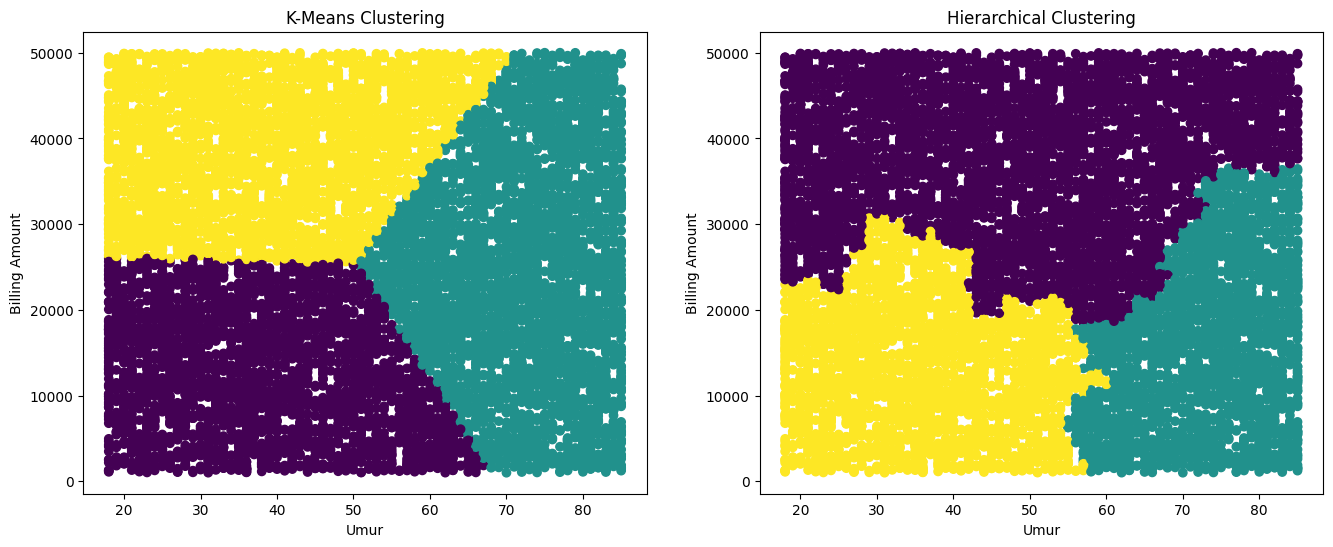

In [40]:
X_cluster = healthcare_dataset[['Age', 'Billing Amount']]
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
healthcare_dataset['KMeans_Cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Hierarchical Clustering (Agglomerative)
agg_cluster = AgglomerativeClustering(n_clusters=3)
healthcare_dataset['Agg_Cluster'] = agg_cluster.fit_predict(X_cluster_scaled)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_cluster['Age'], X_cluster['Billing Amount'], c=healthcare_dataset['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Umur')
plt.ylabel('Billing Amount')

plt.subplot(1, 2, 2)
plt.scatter(X_cluster['Age'], X_cluster['Billing Amount'], c=healthcare_dataset['Agg_Cluster'], cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Umur')
plt.ylabel('Billing Amount')

plt.show()

## Apriori For Association Pattern

In [44]:
X_reg = healthcare_dataset[['Age', 'Duration of Stay']]
y_reg = healthcare_dataset['Billing Amount']
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Regresi Linear
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_reg_train, y_reg_train)
linear_reg_predictions = linear_reg_model.predict(X_reg_test)

# Random Forest Regressor
rf_reg_model = RandomForestRegressor()
rf_reg_model.fit(X_reg_train, y_reg_train)
rf_reg_predictions = rf_reg_model.predict(X_reg_test)

# Decision Tree Regressor sebagai alternatif
dt_reg_model = DecisionTreeRegressor()
dt_reg_model.fit(X_reg_train, y_reg_train)
dt_reg_predictions = dt_reg_model.predict(X_reg_test)

# KNN Regressor
knn_reg_model = KNeighborsRegressor()
knn_reg_model.fit(X_reg_train, y_reg_train)
knn_reg_predictions = knn_reg_model.predict(X_reg_test)

# Evaluasi kinerja model
print("Linear Regression:")
print("MSE:", mean_squared_error(y_reg_test, linear_reg_predictions))
print("MAE:", mean_absolute_error(y_reg_test, linear_reg_predictions))

print("\nRandom Forest Regressor:")
print("MSE:", mean_squared_error(y_reg_test, rf_reg_predictions))
print("MAE:", mean_absolute_error(y_reg_test, rf_reg_predictions))

print("\nDecision Tree Regressor:")
print("MSE:", mean_squared_error(y_reg_test, dt_reg_predictions))
print("MAE:", mean_absolute_error(y_reg_test, dt_reg_predictions))

print("\nKNN Regressor:")
print("MSE:", mean_squared_error(y_reg_test, knn_reg_predictions))
print("MAE:", mean_absolute_error(y_reg_test, knn_reg_predictions))

Linear Regression:
MSE: 199969401.82357073
MAE: 12276.463693889667

Random Forest Regressor:
MSE: 242178237.80368495
MAE: 13159.041867331523

Decision Tree Regressor:
MSE: 259456329.84853604
MAE: 13514.08290333027

KNN Regressor:
MSE: 235585330.29528147
MAE: 13079.762499517616
